In [1]:
!pip install pandas textblob

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Vaishnavi M
[nltk_data]     Shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
from textblob import TextBlob

In [4]:
import pandas as pd

# Load the data
df = pd.read_csv('archive/USvideos.csv')

# Check the structure
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
# Create a clean text column for analysis
df['clean_title'] = df['title'].astype(str).str.lower()

# Check a few cleaned titles
df[['title', 'clean_title']].head()

,title,clean_title
0,WE WANT TO TALK ABOUT OUR MARRIAGE,we want to talk about our marriage
1,The Trump Presidency: Last Week Tonight with J...,the trump presidency: last week tonight with j...
2,"Racist Superman | Rudy Mancuso, King Bach & Le...","racist superman | rudy mancuso, king bach & le..."
3,Nickelback Lyrics: Real or Fake?,nickelback lyrics: real or fake?
4,I Dare You: GOING BALD!?,i dare you: going bald!?


In [6]:
from textblob import TextBlob

# Function to calculate polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply to the clean_title column
df['sentiment_score'] = df['clean_title'].apply(get_sentiment)

# Create sentiment label based on polarity
def label_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

# Check results
df[['clean_title', 'sentiment_score', 'sentiment_label']].head()

,clean_title,sentiment_score,sentiment_label
0,we want to talk about our marriage,0.00,Neutral
1,the trump presidency: last week tonight with j...,0.00,Neutral
2,"racist superman | rudy mancuso, king bach & le...",0.00,Neutral
3,nickelback lyrics: real or fake?,-0.75,Negative
4,i dare you: going bald!?,0.00,Neutral


In [7]:
# Select relevant columns for output
output_df = df[['video_id', 'title', 'publish_time', 'views', 'likes', 'sentiment_score', 'sentiment_label']]

# Save to CSV
output_df.to_csv('processed_usvideos.csv', index=False)

print("✅ ETL pipeline completed! Processed data saved as 'processed_usvideos.csv'")

✅ ETL pipeline completed! Processed data saved as 'processed_usvideos.csv'


In [8]:
# Data Profiling
print("🔹 Data Profiling Summary:")
print("Number of rows:", len(df))
print("\nNull values per column:\n", df.isnull().sum())
print("\nUnique counts per column:\n", df.nunique())

# Length of titles
df['title_length'] = df['title'].apply(len)
print("\nTitle length statistics:\n", df['title_length'].describe())

# Check for any duplicates
duplicate_count = df.duplicated(subset=['video_id', 'title']).sum()
print(f"\nNumber of duplicate rows based on 'video_id' and 'title': {duplicate_count}")

🔹 Data Profiling Summary:
Number of rows: 40949

Null values per column:
 video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
clean_title                 0
sentiment_score             0
sentiment_label             0
dtype: int64

Unique counts per column:
 video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   

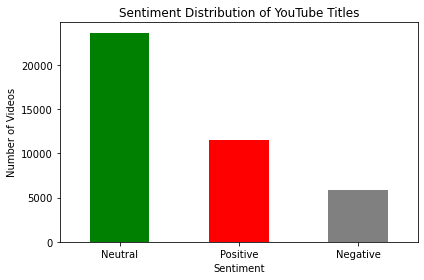

In [9]:
import matplotlib.pyplot as plt

# Sentiment distribution
sentiment_counts = df['sentiment_label'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])

plt.title('Sentiment Distribution of YouTube Titles')
plt.xlabel('Sentiment')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
import logging

logging.basicConfig(filename='etl_pipeline.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.info('ETL pipeline started.')

In [11]:
logging.info('ETL pipeline completed successfully. Processed data saved as "processed_usvideos.csv".')

In [12]:
def extract_data(filepath):
    logging.info(f"Extracting data from {filepath}")
    df = pd.read_csv(filepath)
    return df

def transform_data(df):
    logging.info("Starting data transformation.")
    df['clean_title'] = df['title'].astype(str).str.lower()
    df['sentiment_score'] = df['clean_title'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
    return df

def load_data(df, output_path):
    logging.info(f"Saving processed data to {output_path}")
    df.to_csv(output_path, index=False)
    logging.info("Data saved successfully.")


In [13]:
input_file = 'archive/USvideos.csv'
output_file = 'processed_usvideos.csv'

df = extract_data(input_file)
df = transform_data(df)
load_data(df, output_file)

print("✅ Modular ETL pipeline completed successfully!")

✅ Modular ETL pipeline completed successfully!
